In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [ ]:
data =pd.read_excel('/content/churn_data.xlsx')
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Phone_Service'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
    'Streaming_Music','Streaming_Movies','Unlimited_Data',  'Contract', 'Paperless_Billing',
    'Payment_Method'
]


# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
print(len(X.columns))
print(X.isna().sum())


27
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
dtype: int64


In [ ]:


# Check for missing values in y
print("Missing values in y:")
print(y.isna().sum())
# Impute missing values in y with the most frequent value
y.fillna(y.mode()[0], inplace=True)
print(y.isna().sum())

Missing values in y:
411
0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Confusion Matrix:
[[864  80]
 [157 183]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       944
         1.0       0.70      0.54      0.61       340

    accuracy                           0.82      1284
   macro avg       0.77      0.73      0.74      1284
weighted avg       0.81      0.82      0.81      1284



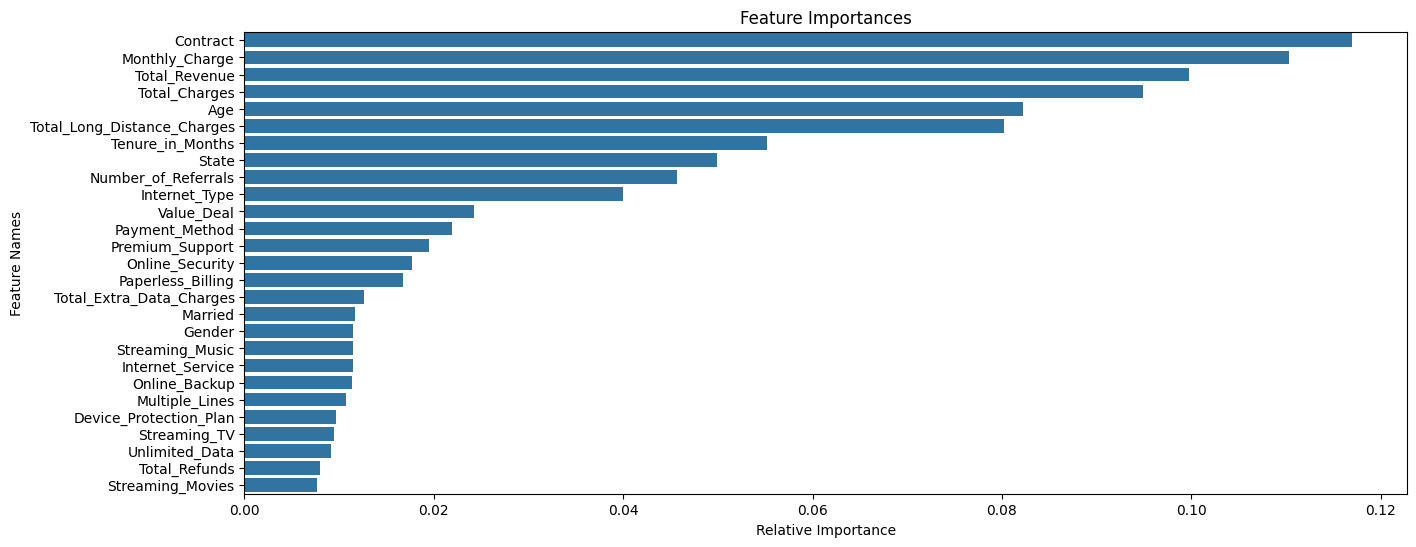

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()





In [ ]:

# Define the path to the Joiner Data Excel file
new_data = pd.read_csv('/content/Customer_Data.csv')

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason', 'Phone_Service'], axis=1)

# Apply the imputer to the categorical columns
for column in new_data.select_dtypes(include=['object']).columns:
    # Ensure the data is in the correct shape (2D)
    reshaped_column = new_data[[column]]

    # Create an instance of SimpleImputer for categorical data
    imputer = SimpleImputer(strategy='most_frequent')

    # First, impute missing values
    new_data[column] = imputer.fit_transform(reshaped_column).ravel()

    # Then, apply the LabelEncoder
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])

# After preprocessing, reset the index of both DataFrames to ensure alignment
original_data = original_data.reset_index(drop=True)
new_data = new_data.reset_index(drop=True)

# Check that both DataFrames have the same number of rows
assert len(original_data) == len(new_data), "Mismatch in row count after preprocessing!"

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the churned customers to a CSV file
churned_customers.to_csv(r"C:\Users\Hp\Downloads\predicted_data.csv", index=False)

# Print the number of rows in the churned_customers DataFrame
print(f"Number of churned customers: {len(churned_customers)}")


Number of churned customers: 1521
